# Visualizaciones

Se genera una red de las 30 empresas con mayor capitalizacion de mercado que cotizan en el S&P500.

- **Nodos**: 30 tickers con mayor market cap del S&P 500.
- **Aristas dirigidas**: $u\to v$ significa “$u$ provee a $v$”.


In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from typing import List, Tuple

V: List[str] = [
    "AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "GOOG", "AVGO", "META", "TSLA", "BRK.B",
    "JPM", "V", "MA", "WMT", "COST", "ORCL", "LLY", "XOM", "JNJ", "PLTR",
    "BAC", "ABBV", "MU", "HD", "NFLX", "AMD", "PG", "GE", "CVX", "UNH"
]

E: List[Tuple[str, str]] = [
    # semiconductores / hardware / computo
    ("MU", "NVDA"),
    ("AVGO", "AAPL"),

    ("NVDA", "MSFT"), ("NVDA", "AMZN"), ("NVDA", "GOOG"), ("NVDA", "GOOGL"),
    ("NVDA", "ORCL"), ("NVDA", "META"), ("NVDA", "TSLA"),

    ("AMD", "AMZN"), ("AMD", "MSFT"), ("AMD", "ORCL"), ("AMD", "TSLA"),

    # nube / servicios
    ("AMZN", "NFLX"),
    ("AMZN", "XOM"), ("AMZN", "JNJ"), ("AMZN", "ABBV"),
    ("AMZN", "PLTR"),

    ("MSFT", "CVX"), ("MSFT", "GE"), ("MSFT", "UNH"),
    ("MSFT", "PLTR"),

    ("GOOGL", "PLTR"),
    ("ORCL", "PLTR"),

    # retail
    ("AAPL", "WMT"), ("AAPL", "COST"),
    ("PG", "WMT"),
    ("BRK.B", "WMT"),

    # pagos / tarjetas
    ("V", "COST"), ("V", "HD"), ("V", "BAC"),
    ("MA", "HD"), ("MA", "WMT"), ("MA", "AAPL"), ("MA", "BAC"),
    ("JPM", "AAPL"),

    # farmacia
    ("LLY", "AMZN"),
]


In [4]:
G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)

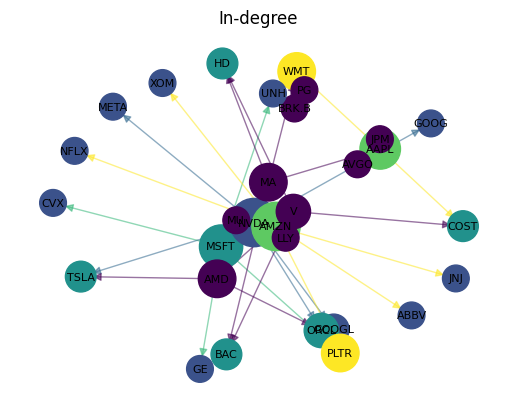

In [5]:
def draw_style_1(G: nx.DiGraph) -> None:

    in_deg = dict(G.in_degree())
    tot_deg = {v: G.in_degree(v) + G.out_degree(v) for v in G.nodes()}

    pos = nx.spring_layout(G, seed=7)
    node_sizes = [250 + 120 * tot_deg[v] for v in G.nodes()]
    node_colors = [in_deg[v] for v in G.nodes()]
    edge_colors = [in_deg[u] for (u, v) in G.edges()]

    plt.figure()
    nx.draw_networkx_edges(G, pos, alpha=0.55, arrows=True, arrowsize=12, edge_color=edge_colors)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                           node_color=node_colors)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("In-degree")
    plt.axis("off")
    plt.show()


draw_style_1(G)

Los que mas compran son Walmart y Palantir

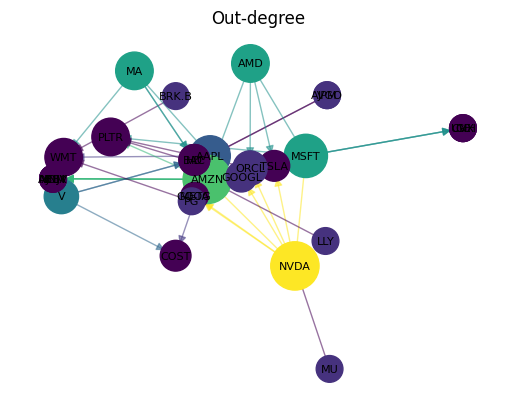

In [6]:
def draw_style_2(G: nx.DiGraph) -> None:

    pos = nx.kamada_kawai_layout(G)

    out_deg = dict(G.out_degree())
    tot_deg = {v: G.in_degree(v) + G.out_degree(v) for v in G.nodes()}

    node_sizes = [250 + 120 * tot_deg[v] for v in G.nodes()]
    node_colors = [out_deg[v] for v in G.nodes()]
    edge_colors = [out_deg[u] for (u, v) in G.edges()]

    plt.figure()
    nx.draw_networkx_edges(G, pos, alpha=0.55, arrows=True,
                           arrowsize=12, edge_color=edge_colors)
    nx.draw_networkx_nodes(
        G, pos, node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("Out-degree")
    plt.axis("off")
    plt.show()


draw_style_2(G)

El que mas vende es Nvidia

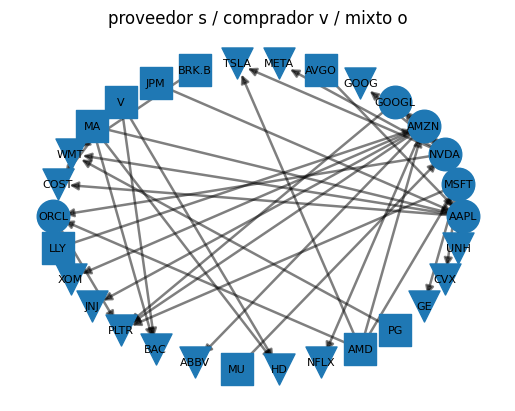

In [9]:
def draw_style_3(G: nx.DiGraph) -> None:
    in_deg = dict(G.in_degree())
    out_deg = dict(G.out_degree())

    suppliers = [v for v in G.nodes() if in_deg[v] == 0]
    buyers = [v for v in G.nodes() if out_deg[v] == 0]
    mixed = [v for v in G.nodes() if v not in suppliers + buyers]

    pos = nx.circular_layout(G)

    plt.figure()
    nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True,
                           arrowsize=12, width=1.8)

    nx.draw_networkx_nodes(G, pos, nodelist=suppliers,
                           node_shape="s", node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=buyers,
                           node_shape="v", node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=mixed,
                           node_shape="o", node_size=550)

    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("proveedor s / comprador v / mixto o")
    plt.axis("off")
    plt.show()


draw_style_3(G)

Hay varios que son unicamente compradores, como Walmart; unicamente vendedores, como Micron; mixtos, como Nvidia

## Matriz de adyacencia


In [9]:
def adjacency_matrix_df(G: nx.DiGraph, nodelist: List[str] | None = None) -> pd.DataFrame:
    if nodelist is None:
        nodelist = sorted(G.nodes())
    A = nx.to_numpy_array(G, nodelist=nodelist, dtype=int)
    return pd.DataFrame(A, index=nodelist, columns=nodelist)


nodes = sorted(G.nodes())
A_full_df = adjacency_matrix_df(G, nodelist=nodes)
A_full_df

,AAPL,ABBV,AMD,AMZN,AVGO,BAC,BRK.B,COST,CVX,GE,...,NFLX,NVDA,ORCL,PG,PLTR,TSLA,UNH,V,WMT,XOM
AAPL,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
ABBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMD,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
AMZN,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
AVGO,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRK.B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
COST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Subgrafo inducido de 8 nodos y potencias $A^2,\dots,A^8$


In [10]:
nodes8 = ["MU", "NVDA", "MSFT", "AMZN", "GOOGL", "GOOG", "ORCL", "PLTR"]
H = G.subgraph(nodes8).copy()
H.number_of_edges()

10

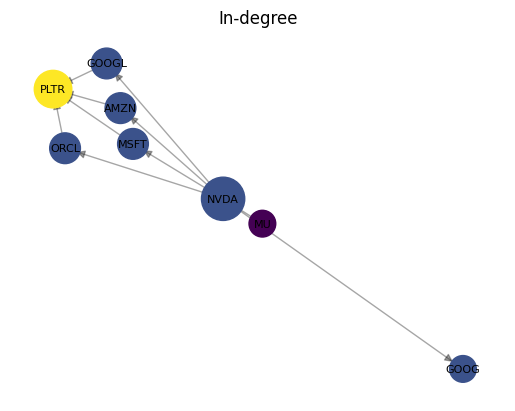

In [11]:
draw_style_1(H)

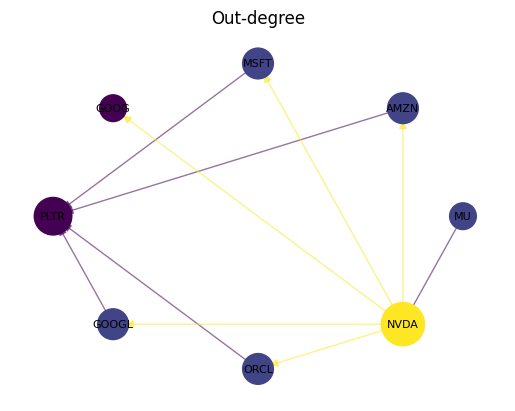

In [12]:
draw_style_2(H)

In [13]:
A8_df = adjacency_matrix_df(H, nodelist=nodes8)
A8_df

,MU,NVDA,MSFT,AMZN,GOOGL,GOOG,ORCL,PLTR
MU,0,1,0,0,0,0,0,0
NVDA,0,0,1,1,1,1,1,0
MSFT,0,0,0,0,0,0,0,1
AMZN,0,0,0,0,0,0,0,1
GOOGL,0,0,0,0,0,0,0,1
GOOG,0,0,0,0,0,0,0,0
ORCL,0,0,0,0,0,0,0,1
PLTR,0,0,0,0,0,0,0,0


In [ ]:
A8 = A8_df.to_numpy(dtype=int)

powers = {}
for k in range(2, 9):
    Ak = np.linalg.matrix_power(A8, k)
    powers[k] = pd.DataFrame(Ak, index=nodes8, columns=nodes8)

for k in range(2, 4):
    print(f"\nA^{k}:")
    display(powers[k])


A^2:


,MU,NVDA,MSFT,AMZN,GOOGL,GOOG,ORCL,PLTR
MU,0,0,1,1,1,1,1,0
NVDA,0,0,0,0,0,0,0,4
MSFT,0,0,0,0,0,0,0,0
AMZN,0,0,0,0,0,0,0,0
GOOGL,0,0,0,0,0,0,0,0
GOOG,0,0,0,0,0,0,0,0
ORCL,0,0,0,0,0,0,0,0
PLTR,0,0,0,0,0,0,0,0



A^3:


,MU,NVDA,MSFT,AMZN,GOOGL,GOOG,ORCL,PLTR
MU,0,0,0,0,0,0,0,4
NVDA,0,0,0,0,0,0,0,0
MSFT,0,0,0,0,0,0,0,0
AMZN,0,0,0,0,0,0,0,0
GOOGL,0,0,0,0,0,0,0,0
GOOG,0,0,0,0,0,0,0,0
ORCL,0,0,0,0,0,0,0,0
PLTR,0,0,0,0,0,0,0,0


MU $\to$ PLTR en $A^3_{\text{MU, PLTR}}$ significa que, despues de que MU le vendio a 4 empresas, que despues de 3 ciclos llegaron a PLTR (MU le vendio a NVDA, NVDA a MSFT y MSFT a PLTR),

- MU $\to$ NVDA $\to$ MSFT $\to$ PLTR
- MU $\to$ NVDA $\to$ AMZN $\to$ PLTR
- MU $\to$ NVDA $\to$ GOOGL $\to$ PLTR
- MU $\to$ NVDA $\to$ ORCL $\to$ PLTR

Luego, en $A^4$, todos se hacen 0 porque ya no hay mas caminos, en las componentes no habia ciclos y el diametro era de 4.